In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Here its a small dataset and to understand how clustering works, i will create a cluster using two variables "Annual Income" and "Spending Score" and will look at its visualization.

In [4]:
X = dataset.iloc[:,[3,4]].values

About KMeans from documentation.
The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

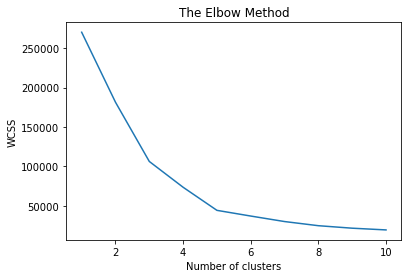

In [7]:
%matplotlib inline
from sklearn.cluster import KMeans
#This will tell us best no of cluster possible for our dataset.Lets draw a graph upto 10 clusters and visualize it.
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

From this we found that 5 clusters appears to be best for our training set. Now lets visualize at these 5 clusters.


In [8]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_means = kmeans.fit_predict(X)

In [11]:
y_means[1]

3

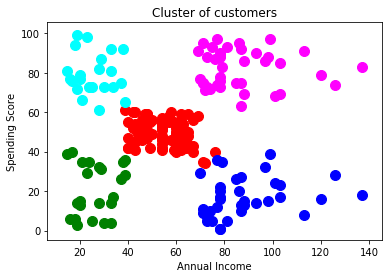

In [15]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],s = 100, c = 'red', label = 'cluster1')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],s = 100, c = 'blue', label = 'cluster2')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],s = 100, c = 'green', label = 'cluster3')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],s = 100, c = 'cyan', label = 'cluster4')
plt.scatter(X[y_means == 4,0],X[y_means == 4,1],s = 100, c = 'magenta', label = 'cluster5')
plt.title('Cluster of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.lege